# Modulo 4: Ejercicio 3
## Alumno: Jose Suarez

### Ejercicio 1
Vamos a volver a nuestra base de datos de compras de supermercado. Para esto cargaremos las tablas en DataFrames de la misma forma que lo hicimos en las actividades del módulo 3. Sin embargo, esta vez usaremos Matplotlib para graficar algunos datos de interés.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
plt.style.use("dark_background")

delimitador = "\n" + "-" * 60 + "\n"

clientes = pd.read_csv("clientes.csv", encoding='latin-1')
productos = pd.read_csv("productos.csv", encoding='latin-1')
boletas = pd.read_csv("boletas.csv", encoding='latin-1')
boletas["fecha"] = pd.to_datetime(boletas['fecha'])
detalle = pd.read_csv("detalle.csv", encoding='latin-1')

### a) Lo primero que haremos es crear un gráfico circular con la distribución porcentual de las ventas por producto.

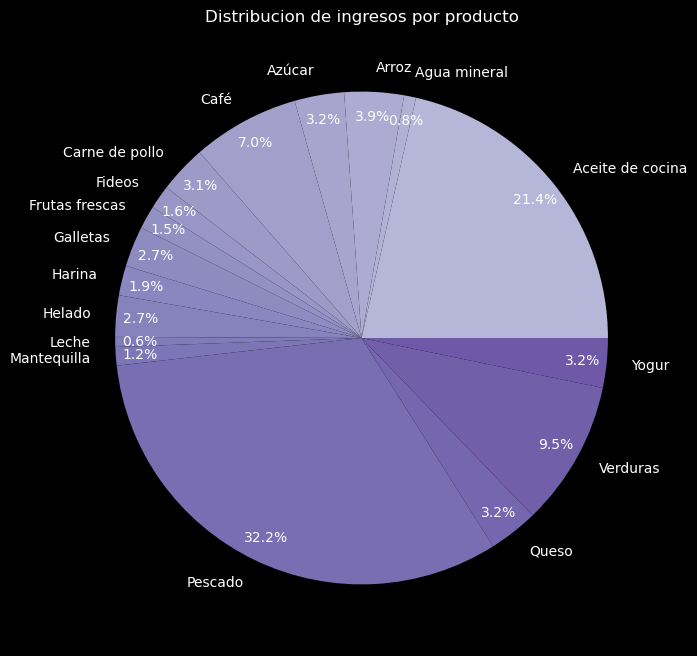

In [2]:
detalle_productos = detalle.merge(productos, left_on = "codigo_producto", 
                                  right_on = "codigo", how="left").drop("codigo", axis=1)

detalle_productos["Subtotal"] = detalle_productos["cantidad"] * detalle_productos["precio"]

boleta_productos = boletas.merge(detalle_productos, left_on = "numero", 
                                 right_on = "numero_boleta", how="right").drop("numero", axis=1)

clientes_productos = clientes[["rut","comuna"]].merge(boleta_productos, left_on = "rut", 
                                    right_on="rut_cliente", 
                                    how="right").drop(["rut_cliente", "rut"], axis=1)
clientes_productos = clientes_productos.reindex(["numero_boleta","fecha","comuna","codigo_producto",
                                                 "nombre","cantidad", "Subtotal"],axis=1)

suma_productos = clientes_productos[["nombre","Subtotal"]].groupby(["nombre"]).sum("Subtotal")
# print(suma_productos)
fig, axround = plt.subplots(figsize=(8,8))
axround.pie(suma_productos["Subtotal"].tolist(), labels=suma_productos.index.values, autopct='%1.1f%%', 
       pctdistance=.9, colors=plt.cm.Purples(np.linspace(0.4, 1.2, len(clientes_productos["nombre"]))))
plt.title("Distribucion de ingresos por producto")
plt.show()

### b) Como segundo ejercicio, crearemos un histograma para graficar las ventas por fecha. Graficar en conjunto con puntos (marcadores) para cada dato en un color diferente. Agregar una etiqueta al valor máximo.

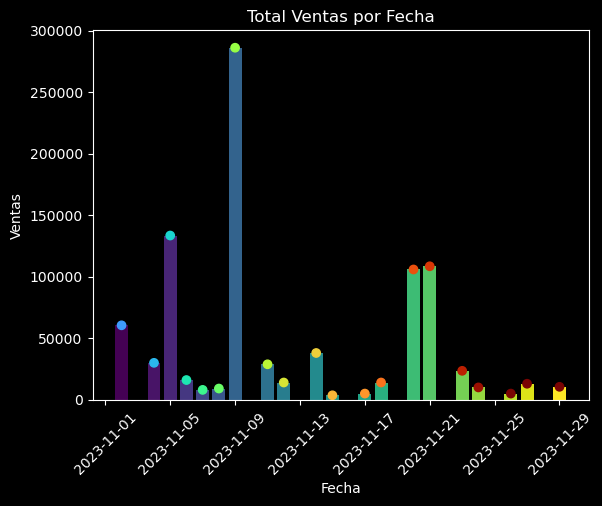

In [3]:

suma_fecha = clientes_productos[["fecha","Subtotal"]].groupby(["fecha"]).sum(["Subtotal"])
# suma_fecha.sort_index()
# suma_fecha.index = mdates.epoch2num(suma_fecha.index)
suma_fecha.reset_index(inplace=True)
plt.bar(suma_fecha["fecha"], suma_fecha["Subtotal"], color=plt.cm.viridis(np.linspace(0, 1, len(suma_fecha["fecha"]))))
plt.scatter(suma_fecha["fecha"], suma_fecha["Subtotal"], color=plt.cm.turbo(np.linspace(0.2, 1.1, len(suma_fecha["fecha"]))))
plt.xticks(rotation=45)
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.title("Total Ventas por Fecha")


plt.show()



### c) Ahora, crearemos un diagrama para graficar la dispersión de los precios delos producto y encontrar los outliers de los precios de los productos. Agregar una flecha a cada valor descubierto.

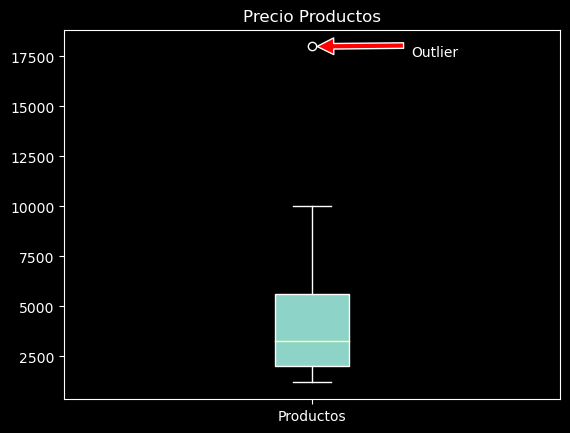

In [4]:
plt.boxplot(productos["precio"], labels = ["Productos"],patch_artist=True)
plt.annotate('Outlier', xy=(1, 18000), xytext=(1.2, 17500),
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.title("Precio Productos")
plt.show()

### d) Agregar, por último, un gráfico de ventas por usuario.

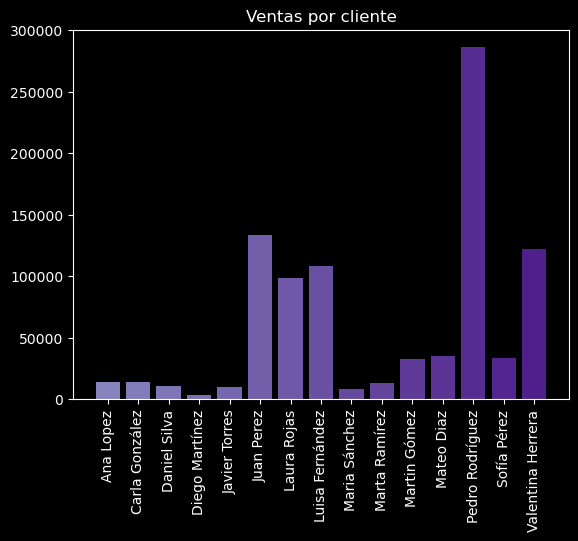

In [5]:
clientes_ventas = clientes[["rut","nombre"]].merge(boleta_productos.drop(["nombre","codigo_producto","precio"],axis=1), left_on = "rut", 
                                    right_on="rut_cliente", 
                                    how="right").drop(["rut_cliente"], axis=1)
clientes_ventas = clientes_ventas.groupby("nombre").sum("Subtotal")
plt.bar(height=clientes_ventas["Subtotal"],x=clientes_ventas.index, color=plt.cm.Purples(np.linspace(.6, .9, len(clientes_ventas.index))))
plt.xticks(rotation=90)
plt.title("Ventas por cliente")
plt.show()

### e) Unir los cuatro gráficos en una sola imagen (subgráfico).

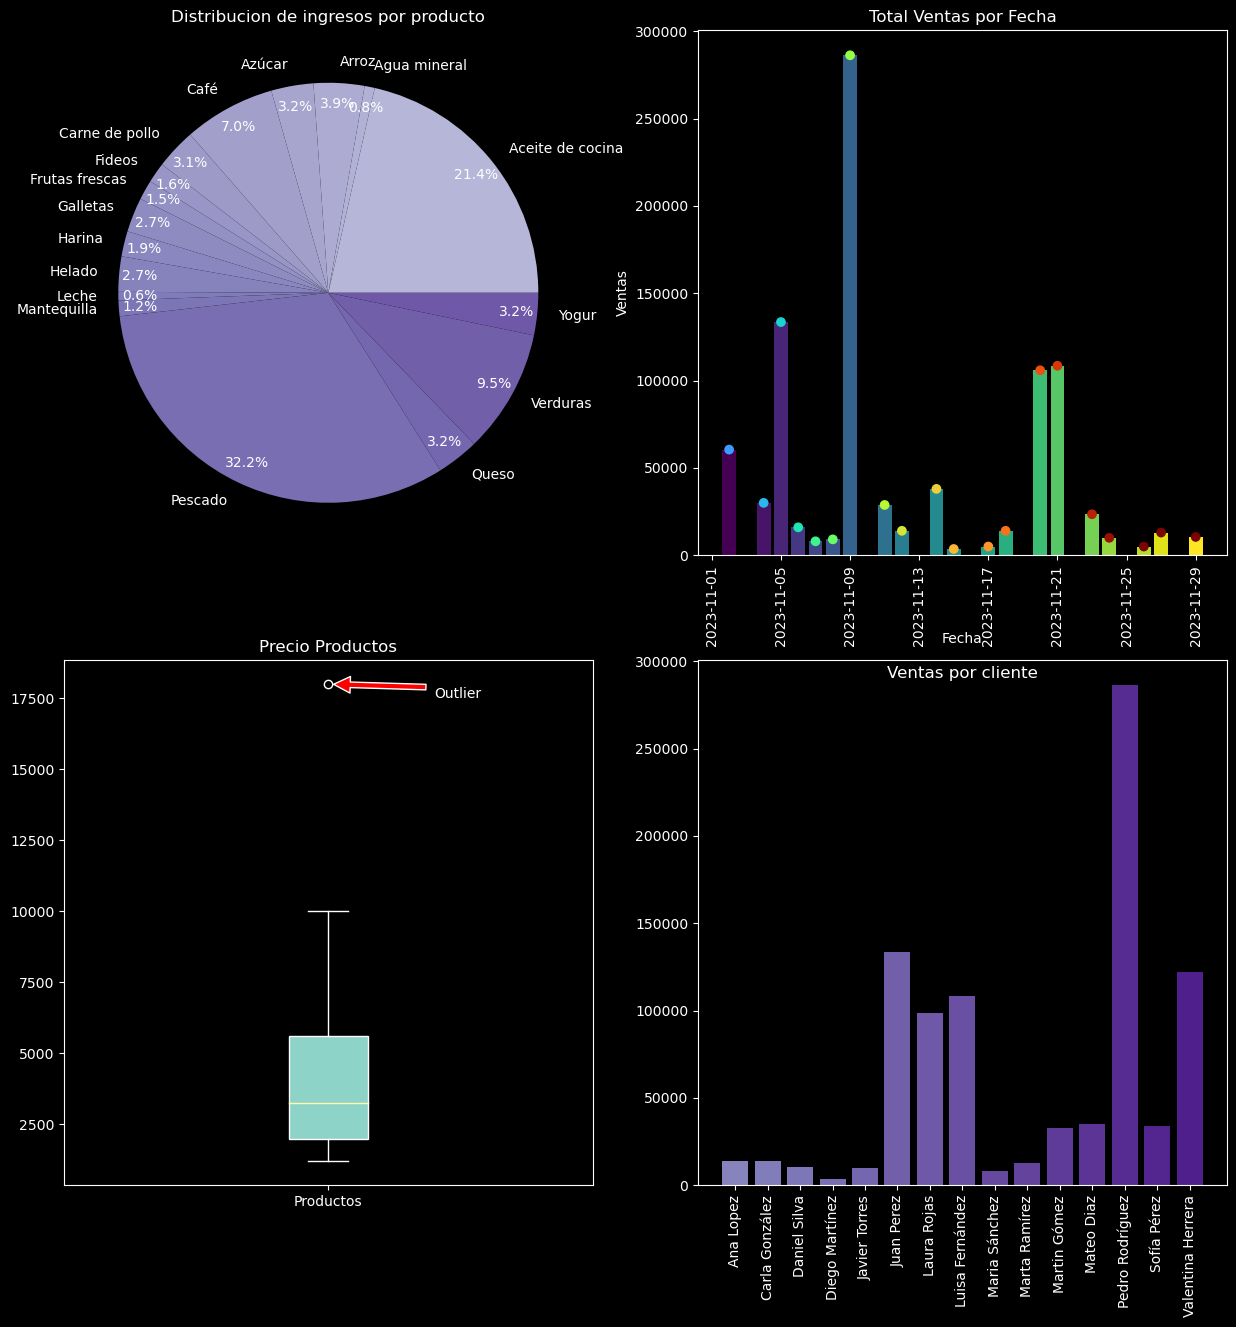

In [6]:
fig, axs = plt.subplots(2,2, figsize=(15,15))

axs[0][0].pie(suma_productos["Subtotal"].tolist(), labels=suma_productos.index.values, autopct='%1.1f%%', 
       pctdistance=.9, colors=plt.cm.Purples(np.linspace(0.4, 1.2, len(clientes_productos["nombre"]))))
axs[0][0].set_title("Distribucion de ingresos por producto")

""""""

axs[0][1].bar(suma_fecha["fecha"], suma_fecha["Subtotal"], color=plt.cm.viridis(np.linspace(0, 1, len(suma_fecha["fecha"]))))
axs[0][1].scatter(suma_fecha["fecha"], suma_fecha["Subtotal"], color=plt.cm.turbo(np.linspace(0.2, 1.1, len(suma_fecha["fecha"]))))
plt.setp(axs[0][1].xaxis.get_majorticklabels(), rotation=90 )
axs[0][1].set_xlabel("Fecha", labelpad= -10)
axs[0][1].set_ylabel("Ventas")
axs[0][1].set_title("Total Ventas por Fecha")

""""""

axs[1][0].boxplot(productos["precio"], labels = ["Productos"], patch_artist=True)
axs[1][0].annotate('Outlier', xy=(1, 18000), xytext=(1.2, 17500),
             arrowprops=dict(facecolor='red', shrink=0.05))
axs[1][0].set_title("Precio Productos")

""""""

axs[1][1].bar(height=clientes_ventas["Subtotal"],x=clientes_ventas.index, color=plt.cm.Purples(np.linspace(.6, .9, len(clientes_ventas.index))))
plt.setp(axs[1][1].xaxis.get_majorticklabels(), rotation=90 )
axs[1][1].set_title("Ventas por cliente", y=.95)

plt.show()

import seaborn as sns
plt.figure(figsize=(20,10))
# print(suma_fecha)
sns.barplot(x = suma_fecha["fecha"], y = suma_fecha["Subtotal"], palette = sns.color_palette("hsv", len(suma_fecha["fecha"])))
plt.show()